<a href="https://colab.research.google.com/github/hyetae/2023-graduate/blob/main/preprocessing/BoundingBox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Settings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Pure Bounding Box

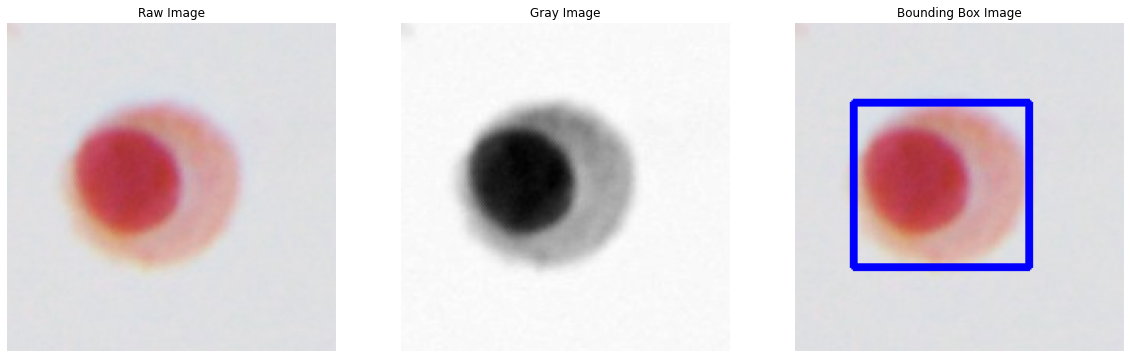

In [ ]:
#raw
macro = cv2.imread('/content/drive/MyDrive/cell-data/macro.jpeg')

#gray
img_gray = cv2.cvtColor(macro, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 190, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#bounding box
img_bb = macro.copy()
cnt = contours[1]
x, y, w, h = cv2.boundingRect(cnt)
cv2.rectangle(img_bb, (x, y), (x+w, y+h), (0,0,255), 3)

#print
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Raw Image")
plt.imshow(macro)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Gray Image")
plt.imshow(img_gray, cmap='gray')
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Bounding Box Image")
plt.imshow(img_bb)
plt.axis("off")
plt.show()

In [ ]:
def bound_box(value):

  RGB = cv2.cvtColor(value, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(RGB, cv2.COLOR_RGB2GRAY)
  res, thr = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)
  contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  img_copy = value.copy()
  for i in range(len(contours[1:])):
    cnt = contours[i]
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0,0,255), 3)

  return img_copy

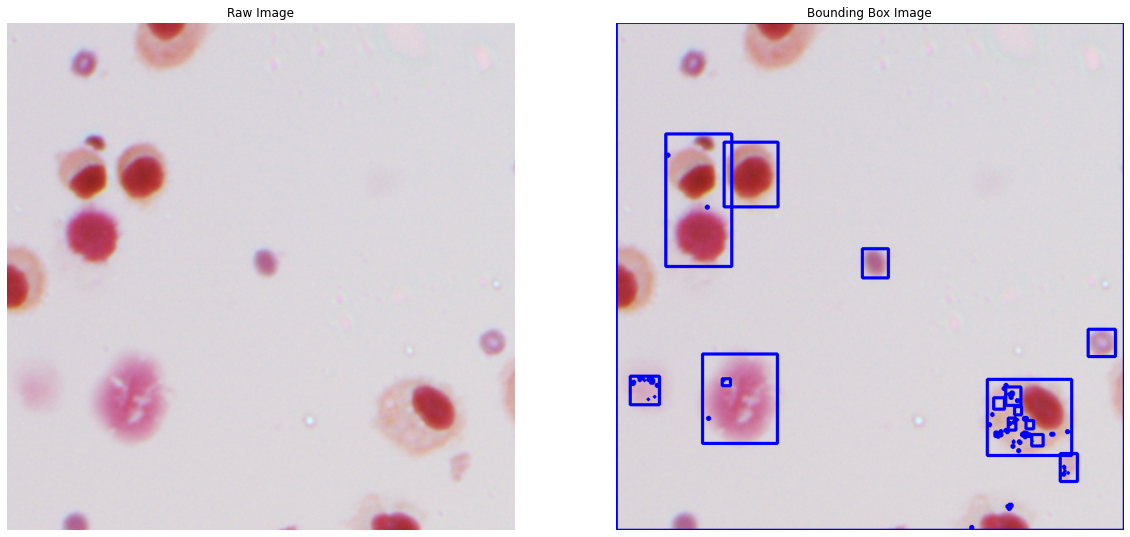

In [ ]:
#raw
cropped = cv2.imread('/content/drive/MyDrive/cell-data/cropped.jpeg')

#bounding box
bb = bound_box(cropped)

#print
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Raw Image")
plt.imshow(cropped)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Bounding Box Image")
plt.imshow(bb)
plt.axis("off")
plt.show()

#Resize Bounding Box

In [ ]:
def resize_bound_box(value):
  RGB = cv2.cvtColor(value, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(RGB, cv2.COLOR_RGB2GRAY)
  res, thr = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)
  contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  img_copy = value.copy()
  for i in range(len(contours[1:])):
    cnt = contours[i]
    x, y, w, h = cv2.boundingRect(cnt)
    if w+h < 80:
      continue
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0,0,255), 3)

  return img_copy

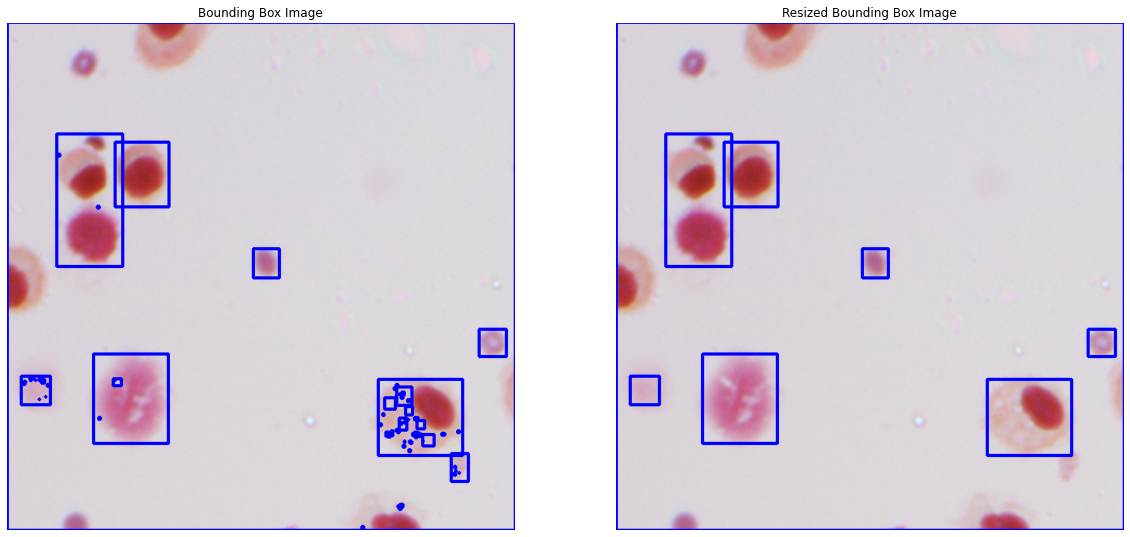

In [ ]:
#bounding box
bb = bound_box(cropped)

#resize bounding box
resize = resize_bound_box(cropped)

#print
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Bounding Box Image")
plt.imshow(bb)
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Resized Bounding Box Image")
plt.imshow(resize)
plt.axis("off")
plt.show()

#Find nucleaer and its cytoplasm

In [ ]:
def cont(value, size):
  RGB = cv2.cvtColor(value, cv2.COLOR_BGR2RGB)
  gray = cv2.cvtColor(RGB, cv2.COLOR_RGB2GRAY)
  res, thr = cv2.threshold(gray, size, 255, cv2.THRESH_BINARY)
  contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  return contours

In [ ]:
def cytoplasm_bound_box(value):
  
  nu_contours = cont(value, 100)

  img_copy = value.copy()
  
  for i in range(len(nu_contours[:])-2):
    cnt = nu_contours[i+1]
    x, y, w, h = cv2.boundingRect(cnt)
    if w+h < 80:
      continue
    else:
      img_cut = img_copy[y-h:y+2*h, x-w:x+2*w]
      cv2_imshow(img_cut)

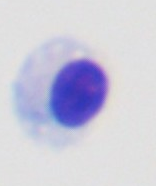

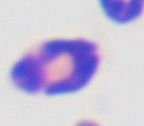

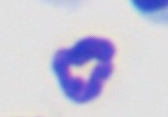

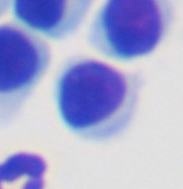

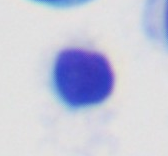

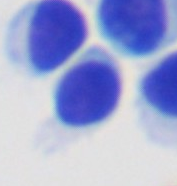

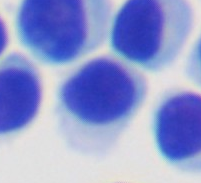

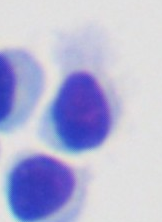

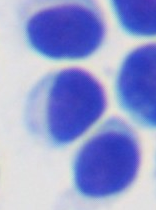

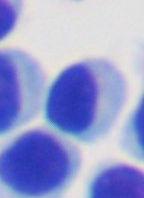

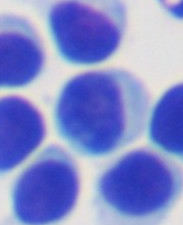

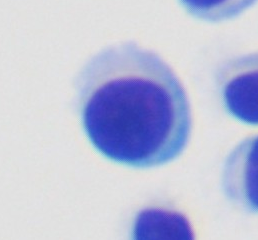

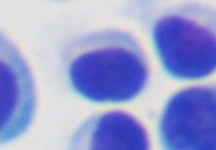

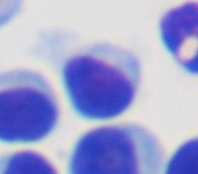

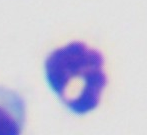

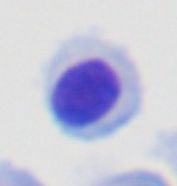

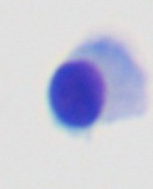

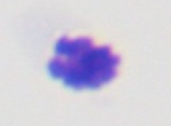

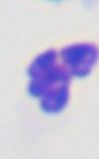

In [ ]:
dense = cv2.imread('/content/drive/MyDrive/cell-data/dense.jpeg')

cytoplasm_bound_box(dense)